<a href="https://colab.research.google.com/github/priyanka36/MLProblems/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install plot_tree
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import tree



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement plot_tree (from versions: none)
ERROR: No matching distribution found for plot_tree


ImportError: ignored

In [4]:
X,y = make_classification(n_samples=100,n_features=2,n_informative=2,n_redundant=0,n_classes=3,random_state=10,flip_y=0.02,class_sep=1,n_clusters_per_class=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 32)


Tree Structure 1


[Text(0.5, 0.9444444444444444, 'X[0] <= -0.247\ngini = 0.664\nsamples = 80\nvalue = [26, 30, 24]'),
 Text(0.4, 0.8333333333333334, 'gini = 0.0\nsamples = 27\nvalue = [0, 27, 0]'),
 Text(0.6, 0.8333333333333334, 'X[1] <= 0.176\ngini = 0.551\nsamples = 53\nvalue = [26, 3, 24]'),
 Text(0.4, 0.7222222222222222, 'X[0] <= 2.12\ngini = 0.331\nsamples = 31\nvalue = [25, 3, 3]'),
 Text(0.3, 0.6111111111111112, 'X[0] <= 0.673\ngini = 0.245\nsamples = 29\nvalue = [25, 3, 1]'),
 Text(0.2, 0.5, 'X[0] <= 0.364\ngini = 0.594\nsamples = 8\nvalue = [4, 3, 1]'),
 Text(0.1, 0.3888888888888889, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.3, 0.3888888888888889, 'X[1] <= -0.99\ngini = 0.56\nsamples = 5\nvalue = [1, 3, 1]'),
 Text(0.2, 0.2777777777777778, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.4, 0.2777777777777778, 'X[0] <= 0.575\ngini = 0.667\nsamples = 3\nvalue = [1, 1, 1]'),
 Text(0.3, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.5, 0.166666666666

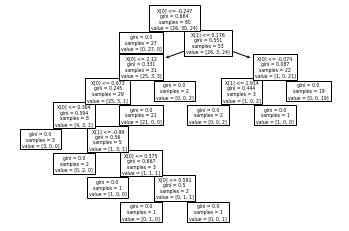

In [10]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier(random_state=12)
clf1.fit(X_train,y_train)
print("Tree Structure 1")
tree.plot_tree(clf1)

In the previous chapter on overfitting, we showed accuracy of decision tree at different depths. The above tree (grown to its entirety) had a training accuracy of 100% and a test accuracy of 75%. The above tree had overfitted the training data.

One way to reduce overfitting is to limit the depth of the tree. For example, in the above plotted tree, we can limit the tree's depth to 3 to remove the left elongated sub-tree. The decision tree, in the default setting, iteratively splits the nodes until all leaves are pure. With max_depth set to 3, it checks if the maximum depth limitation is reached before creating a split. If the maximum depth is reached, the further split is stopped.

In [14]:
import warnings
from IPython.display import Image,display
from sklearn.tree import export_graphviz
import pydotplus



In [17]:
from io import StringIO
def plot_tree(tree_clf,impurity=False):
  dot_data = StringIO()
  label = ['class 0 ',"class 1","class 2"]
  export_graphviz(tree_clf,feature_names=['x1','x2'],impurity=impurity,out_file=dot_data,filled=True,rounded=True,node_ids = True)
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  display(Image(graph.create_png()))

Tree STructure 2


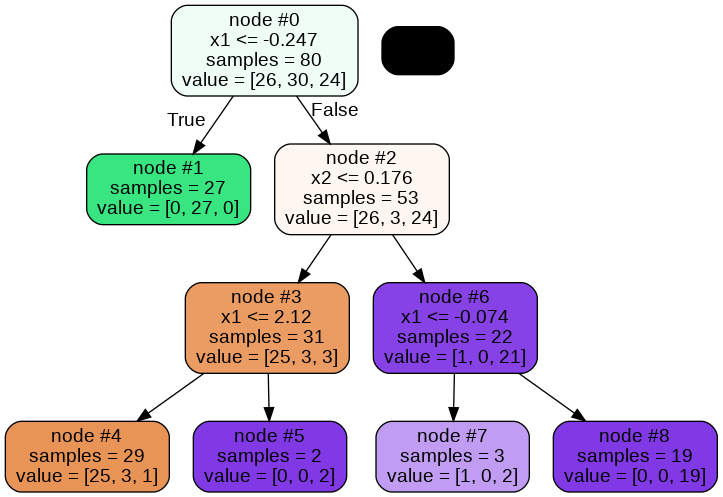

Training Accuracy: 0.9375
Test Accuracy 0.85


In [18]:
from sklearn.metrics import accuracy_score
clf2 = DecisionTreeClassifier(max_depth=3,random_state=12)
clf2.fit(X_train,y_train)
print("Tree STructure 2")
plot_tree(clf2)
print("Training Accuracy:", accuracy_score(y_train, clf2.predict(X_train)))
print("Test Accuracy",accuracy_score(y_test, clf2.predict(X_test)))

Tree Structure 3


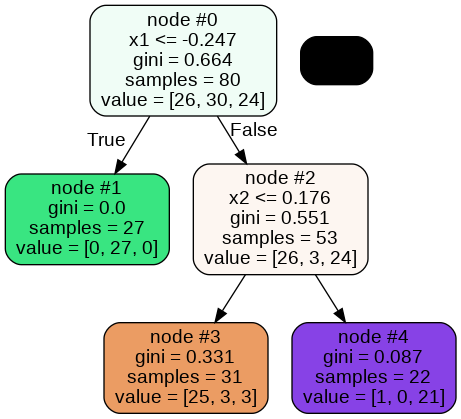

In [19]:
clf3 = DecisionTreeClassifier(min_impurity_decrease=0.1,random_state=12)
clf3.fit(X_train,y_train)
print("Tree Structure 3")
plot_tree(clf3, impurity= True)

Tree Structure 4


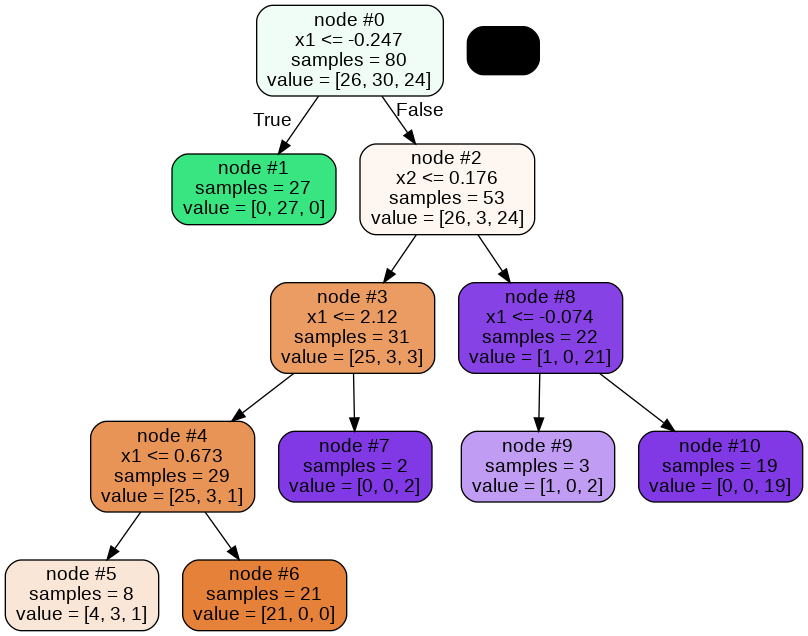

In [20]:
clf4 = DecisionTreeClassifier(min_samples_split=10, random_state = 12)
clf4.fit(X_train, y_train)

print("Tree Structure 4")  
plot_tree(clf4)